In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def collision_time(i,j,positions,vs):
    #calculates the time needed to pass before the two bodies would collide if their velocities remained unchanged
    d = abs(positions[i]-positions[j]) #distance between the objects
    if vs[i]-vs[j] == 0 or d == 0:
        tau = math.inf #in these cases the collision time is infinite
    else:
        #this quantity is positive when the collision can happen and negativ when it cannot happen (due to velocities) 
        tau = d / (vs[i]-vs[j])
        
    #time needed to pass before the collision
    return tau

In [3]:
def all_coll_time(positions,vs,n=4):
    #calculates all the collision times for the bodies
     
    #temporarly this is the collision that will happen 
    temp_c_t = collision_time(0,0,positions,vs)
    temp_i = 0
    temp_j = 0
    for i in range(n): #iterate through the balls
        for j in range(i+1,n): #iterate through all the other balls
            c_t = collision_time(i,j,positions,vs) #calculate collision time for these two balls
            if c_t <= temp_c_t and c_t >= 0: #if the collision time is smaller than the current smallest time and it is positive we save it
                temp_c_t = c_t
                temp_i = i
                temp_j = j
    
    #return the information about the collision that will happen next
    return temp_i,temp_j, temp_c_t

In [4]:
def update_pos(dt,positions,vs):
    #update the positions of the balls based on their velocities
    positions = dt * vs + positions    
    #return the positions
    return positions

In [5]:
def collision(i,j,vs,masses):
    #calculate the outgoing velocities of two colliding particles
    
    #masses
    mi = masses[i]
    mj = masses[j]
    M =  mi + mj
    
    #new velocities
    vs_new = np.copy(vs)
    
    if i == 0: #bouncing back from a wall
        ui = 0
        uj = -vs[j]
    elif j == 0: #bouncing back from a wall (but this case should never happen) 
        ui = -vs[i]
        uj = 0
    else: #if it is a proper collision with two balls then these are the outgoing velocities 
        #formulas are copied from internet
        #source: https://scipython.com/blog/two-dimensional-collisions/
        ui = ((mi-mj)/(M))*vs[i] + ((2*mj)/(M))*vs[j]
        uj = ((2*mi)/(M))*vs[i] + ((mj-mi)/(M))*vs[j]
    
    #set the new velocities
    vs_new[i] = ui
    vs_new[j] = uj
    
    #return new velocities
    return np.array(vs_new)

In [6]:
def sim_3body(x):
    #carry out the simulations for a given value of x
    
    #initial positions of the particles
    positions = np.array([0.,1.,2.,3.])
    
    #masses of the particles
    #a wall is now also a particle with effectively infinite mass sitting at the origin
    masses = np.array([1e30,10-x,x,1.])
    
    #give initial velocities to the balls
    vs_init = np.array([0.,-1.,-1.,-1.])
    
    #rename variable for konvíniensz
    vs = np.copy(vs_init)
    
    #while the third ball did not change the direction of its velocity
    while vs[3]<0:
        
        #get back the time of the next collision and the index of the colliding balls
        ci,cj,ct = all_coll_time(positions, vs)
        
        #update the positions to the moment of collision
        positions = update_pos(ct,positions,vs)
        
        #calculate the new velocities of the colliding balls
        vs = collision(ci,cj,vs,masses)
        
    #return the velocity of the third ball once its velocity has changed its direction
    return vs[3]

In [7]:
xs = np.arange(0.1,10,0.001)
v_final3_list = []

for x in xs:
    v_final3_list.append(sim_3body(x))

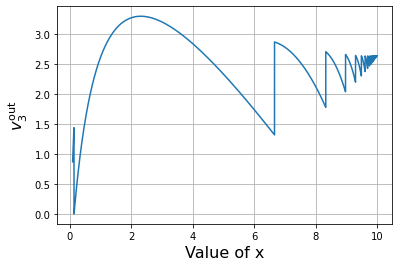

In [8]:
fig = plt.figure()

plt.plot(xs,v_final3_list)

plt.xlabel("Value of x", fontsize = 16)
plt.ylabel(r"$v_3^{\mathrm{out}}$", fontsize = 16)
plt.grid(True)

In [9]:
np.argmax(v_final3_list)

2217

In [10]:
v_final3_list[2217]

3.293400301477238

In [11]:
xs[2217]

2.317000000000002

## Result

The largest outgoing velocity for the third ball was $v_3^{\mathrm{out}} \approx 3.29$ and it occured for $x = 2.317$.